In [13]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
d1 = pd.read_excel('CapstoneData.xlsx')



In [14]:
d1.shape

(40, 58)

In [15]:
#finding percentage change over the years in some selected sectors
d1['Year_new'] = d1['Year']
d1['AGRIC(%)'] = d1['AGRICULTURE'].pct_change()*100
d1['Industry(%)'] = d1['INDUSTRY'].pct_change()*100
d1['Mining(%)'] = d1['MiningQuarrying'].pct_change()*100
d1['NetTaxes(%)'] = d1['NetTaxes'].pct_change()*100
d1['HumanHealth(%)'] = d1['HumanHealthSocialServices'].pct_change()*100
d1['PriceGDP(%)'] = d1['PriceGDP'].pct_change()*100
d1['Crude(%)'] = d1['CrudePetroleumNaturalGas'].pct_change()*100
d1['Education(%)'] = d1['Education'].pct_change()*100
d1['Manufacturing(%)'] = d1['Manufacturing'].pct_change()*100
d1['Services(%)'] = d1['SERVICES'].pct_change()*100
d1['Trade(%)'] = d1['Trade'].pct_change()*100
d1['AccommodationFood(%)'] = d1['AccomadationFood'].pct_change()*100
d1['AirTransport(%)'] = d1['AirTransport'].pct_change()*100
d1['OilRefining(%)'] = d1['OilRefining'].pct_change()*100
d1['InfoComm(%)'] = d1['InformationCommunication'].pct_change()*100
d1['FinancialInsurance(%)'] = d1['FinancialInsurance'].pct_change()*100
d1['RealEstate(%)'] = d1['RealEstate'].pct_change()*100
d1['ArtsEntertainmentRecreation(%)'] = d1['ArtsEntertainmentRecreation'].pct_change()*100
d1['ChemicalPharmaceuticals((%))'] = d1['ChemicalPharmaceuticals'].pct_change()*100
d1['RoadTransport(%)'] = d1['RoadTransport'].pct_change()*100
d1['ChemicalPharmaceuticals(%)'] = d1['ChemicalPharmaceuticals'].pct_change()*100
d1['FoodBeverageTobacco(%)'] = d1['FoodBeverageTobacco'].pct_change()*100


In [16]:
#this is making out several data for my visualization
d2 = d1[d1.columns[58:]] #extracting a new data set consisting of percentage change over the years in various sectors from the original data

d3 = d2.dropna() #dropping null values from the percentage change dataframe

x = d3.round(2) #this rounds the dataframe in d3 to 2 decimal places

x.to_csv("PercentageChange.csv") #data exported to csv file

d4 = d3.describe().T.round(2) #statistical summary of the change over the years

d4.to_csv("PercentageChangeSummary.csv") #exporting the summary statistics as a csv file

d5 = d3.set_index('Year_new')#setting year as the index in d3 data frame whcih id now called d5 

d6 = d1[d1.columns[1:58]] #cutting out the first set of data called d6

#getting the summary statistics of d6 while dropping the year columnn
d7 = d4.transpose()
d7.T.to_csv("PercentageChange.csv") #saving it as a csv file

d8 = d7.T

d9 = d6.describe()




In [17]:
d1.head(2)


,Year,AGRICULTURE,Crops,Livestock,Forestry,Fishing,INDUSTRY,MiningQuarrying,CrudePetroleumNaturalGas,CoalMining,...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
0,1981,17.05,12.82,2.53,1.16,0.55,54.67,13.12,5.92,5.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,20.13,14.32,3.96,1.17,0.67,51.88,9.13,4.93,2.57,...,31.884058,0.0,6.26151,29.806452,6.29771,0.0,5.0,-18.007663,5.0,6.36908


In [18]:
d2.head(2)

,Year_new,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
0,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,18.064516,-5.103347,-30.411585,7.246377,26.54321,6.991601,-16.722973,26.764706,7.368048,...,31.884058,0.0,6.26151,29.806452,6.29771,0.0,5.0,-18.007663,5.0,6.36908


In [19]:
d2.tail(2)

,Year_new,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
38,2019,16.560558,20.053266,-6.441951,5.819655,9.066680,12.822547,-7.624031,8.586119,34.727788,...,32.989622,-29.369600,18.666751,5.858746,4.225502,8.224320,64.483978,32.472534,64.483978,19.695782
39,2020,16.729710,9.155262,-15.017518,34.970077,6.153829,5.914056,-17.780029,-8.819528,16.438115,...,-23.950257,-61.112978,9.127243,11.981082,-3.550613,-5.350091,7.562332,-13.149260,7.562332,13.439956


In [20]:
d3.round(2).describe()

,Year_new,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2001.000000,23.365641,20.564359,27.428974,21.861538,19.883077,20.505385,31.620769,21.014359,19.276667,...,15.928718,34.654359,21.659487,19.909231,23.806923,29.166667,23.927436,21.160513,23.927436,17.622051
std,11.401754,22.020644,22.607069,53.618221,20.113489,27.936142,14.957953,61.649417,28.841421,16.312866,...,16.643604,79.455211,27.496619,24.085074,33.043814,36.632813,21.756379,24.827648,21.756379,16.718342
min,1982.000000,4.260000,-13.620000,-37.220000,-14.480000,3.000000,4.470000,-37.710000,-8.820000,-12.150000,...,-23.950000,-61.110000,-1.100000,-22.920000,-5.910000,-5.350000,-12.500000,-18.010000,-12.500000,-12.210000
25%,1991.500000,10.155000,5.425000,-8.490000,8.775000,7.610000,10.025000,-9.250000,7.115000,8.515000,...,7.940000,-7.335000,7.085000,9.975000,7.910000,10.090000,8.385000,8.245000,8.385000,8.475000
50%,2001.000000,15.580000,19.960000,20.550000,17.970000,12.540000,14.860000,16.260000,14.010000,16.440000,...,13.400000,13.400000,15.040000,15.550000,13.970000,22.560000,16.790000,14.790000,16.790000,14.420000
75%,2010.500000,26.080000,31.195000,46.160000,31.420000,17.835000,28.910000,45.050000,19.425000,26.210000,...,21.440000,46.430000,23.225000,27.275000,27.890000,27.975000,35.640000,28.715000,35.640000,21.010000
max,2020.000000,110.950000,104.500000,237.180000,90.910000,157.750000,75.270000,249.840000,157.630000,67.450000,...,72.910000,280.000000,147.120000,123.450000,194.210000,165.860000,68.130000,120.130000,68.130000,66.990000


In [22]:

d4 #statistical summary of percentage change over the years

,count,mean,std,min,25%,50%,75%,max
Year_new,39.0,2001.00,11.40,1982.00,1991.50,2001.00,2010.50,2020.00
AGRIC(%),39.0,23.36,22.02,4.26,10.15,15.58,26.08,110.95
Industry(%),39.0,20.56,22.61,-13.62,5.43,19.96,31.19,104.50
Mining(%),39.0,27.43,53.62,-37.22,-8.49,20.55,46.16,237.18
NetTaxes(%),39.0,21.86,20.11,-14.48,8.77,17.97,31.42,90.91
HumanHealth(%),39.0,19.88,27.94,3.00,7.61,12.54,17.84,157.75
PriceGDP(%),39.0,20.51,14.96,4.47,10.02,14.86,28.91,75.27
Crude(%),39.0,31.62,61.65,-37.71,-9.25,16.26,45.05,249.84
Education(%),39.0,21.01,28.84,-8.82,7.12,14.01,19.43,157.63
Manufacturing(%),39.0,19.28,16.31,-12.15,8.52,16.44,26.21,67.45


In [52]:

d5.head(2)

,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),Services(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
Year_new,,,,,,,,,,,,,,,,,,,,,
1982,18.064516,-5.103347,-30.411585,7.246377,26.543210,6.991601,-16.722973,26.764706,7.368048,14.138973,...,31.884058,0.000000,6.261510,29.806452,6.297710,0.0,5.000000,-18.007663,5.000000,6.369080
1983,18.231495,4.394757,-12.376780,6.081081,5.365854,6.507883,-13.184584,5.104408,10.491587,4.843833,...,-1.098901,-33.333333,-1.097631,-12.226640,18.491921,0.0,14.285714,-2.336449,14.285714,13.971341


In [53]:
d5.tail(2)

,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),Services(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
Year_new,,,,,,,,,,,,,,,,,,,,,
2019,16.560558,20.053266,-6.441951,5.819655,9.066680,12.822547,-7.624031,8.586119,34.727788,7.862517,...,32.989622,-29.369600,18.666751,5.858746,4.225502,8.224320,64.483978,32.472534,64.483978,19.695782
2020,16.729710,9.155262,-15.017518,34.970077,6.153829,5.914056,-17.780029,-8.819528,16.438115,-1.208091,...,-23.950257,-61.112978,9.127243,11.981082,-3.550613,-5.350091,7.562332,-13.149260,7.562332,13.439956


In [10]:
d6

,AGRICULTURE,Crops,Livestock,Forestry,Fishing,INDUSTRY,MiningQuarrying,CrudePetroleumNaturalGas,CoalMining,MetalOres,...,RealEstate,ProfessionalScientificTechnicalServ.,AdministrativeSupportServices,PublicAdministration,Education,HumanHealthSocialServices,OtherServices,ProductGDP,NetTaxes,PriceGDP
0,17.05,12.82,2.53,1.16,0.55,54.67,13.12,5.92,5.33,1.00,...,5.24,2.59,0.02,9.09,3.40,1.62,1.08,137.93,1.38,139.31
1,20.13,14.32,3.96,1.17,0.67,51.88,9.13,4.93,2.57,0.76,...,5.57,3.92,0.03,11.54,4.31,2.05,1.14,147.57,1.48,149.05
2,23.80,16.35,5.19,1.27,0.99,54.16,8.00,4.28,2.43,0.62,...,6.60,3.73,0.03,12.11,4.53,2.16,1.30,157.18,1.57,158.75
3,30.37,21.50,6.62,1.38,0.87,50.33,9.89,5.24,3.50,0.57,...,6.21,3.87,0.03,12.74,4.76,2.27,1.47,164.21,1.64,165.85
4,34.24,25.07,7.16,1.47,0.54,62.86,14.00,6.59,6.54,0.45,...,6.58,4.33,0.03,13.39,5.00,2.38,1.38,185.98,1.85,187.83
5,35.70,25.97,7.39,1.57,0.77,65.05,12.43,5.54,6.54,0.11,...,7.26,4.86,0.04,14.04,5.25,2.50,1.51,196.17,1.95,198.12
6,50.29,39.66,8.37,1.59,0.66,80.47,22.29,15.48,5.89,0.65,...,7.40,5.37,0.04,14.68,5.49,2.61,1.66,242.26,2.42,244.68
7,73.76,61.85,8.89,1.86,1.17,102.94,22.56,17.30,4.25,0.70,...,7.81,6.12,0.05,18.00,6.73,3.21,1.78,312.50,3.11,315.62
8,88.26,71.88,11.79,2.17,2.41,146.83,49.83,44.33,4.20,0.71,...,11.07,6.78,0.05,20.05,7.49,3.57,1.93,410.77,4.09,414.86
9,106.63,86.93,14.15,2.35,3.21,175.15,63.69,58.06,4.25,0.73,...,12.72,7.75,0.06,22.17,8.29,3.95,2.16,489.77,4.88,494.64


In [12]:
d7

,Year_new,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
count,39.0,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,...,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,2001.0,23.36,20.56,27.43,21.86,19.88,20.51,31.62,21.01,19.28,...,15.93,34.65,21.66,19.91,23.81,29.17,23.93,21.16,23.93,17.62
std,11.4,22.02,22.61,53.62,20.11,27.94,14.96,61.65,28.84,16.31,...,16.64,79.46,27.50,24.08,33.04,36.63,21.76,24.83,21.76,16.72
min,1982.0,4.26,-13.62,-37.22,-14.48,3.00,4.47,-37.71,-8.82,-12.15,...,-23.95,-61.11,-1.10,-22.92,-5.91,-5.35,-12.50,-18.01,-12.50,-12.21
25%,1991.5,10.15,5.43,-8.49,8.77,7.61,10.02,-9.25,7.12,8.52,...,7.94,-7.33,7.08,9.97,7.91,10.09,8.39,8.24,8.39,8.47
50%,2001.0,15.58,19.96,20.55,17.97,12.54,14.86,16.26,14.01,16.44,...,13.40,13.40,15.04,15.55,13.97,22.56,16.79,14.79,16.79,14.42
75%,2010.5,26.08,31.19,46.16,31.42,17.84,28.91,45.05,19.43,26.21,...,21.44,46.43,23.22,27.28,27.89,27.97,35.64,28.71,35.64,21.01
max,2020.0,110.95,104.50,237.18,90.91,157.75,75.27,249.84,157.63,67.45,...,72.91,280.00,147.12,123.45,194.21,165.86,68.13,120.13,68.13,66.99


In [11]:
d9.T #statistical summary of output of all sectors over the years

,count,mean,std,min,25%,50%,75%,max
AGRICULTURE,40.0,7696.40450,10016.062922,17.05,119.0875,1761.915,13296.1250,37241.61
Crops,40.0,6815.02325,8876.279138,12.82,97.9700,1485.160,11884.1375,33177.54
Livestock,40.0,592.94125,725.035315,2.53,15.2225,200.375,1013.5700,2121.37
Forestry,40.0,79.29550,96.259683,1.16,2.4175,27.235,140.0525,285.88
Fishing,40.0,209.14550,351.544085,0.54,3.4875,49.150,258.3650,1657.91
INDUSTRY,40.0,8548.59500,11642.772115,50.33,207.3775,2358.620,14833.1000,43530.78
MiningQuarrying,40.0,3566.91325,4442.379780,8.00,73.5075,1013.535,5627.1650,13648.66
CrudePetroleumNaturalGas,40.0,3509.60875,4363.024184,4.28,65.1400,1004.395,5523.0950,13423.87
CoalMining,40.0,4.47400,2.986320,1.42,2.1525,3.690,6.0525,12.91
MetalOres,40.0,2.23575,3.055294,0.11,0.6175,0.720,2.4400,11.56


In [57]:
d7.tail(2)

,Year_new,AGRIC(%),Industry(%),Mining(%),NetTaxes(%),HumanHealth(%),PriceGDP(%),Crude(%),Education(%),Manufacturing(%),...,AirTransport(%),OilRefining(%),InfoComm(%),FinancialInsurance(%),RealEstate(%),ArtsEntertainmentRecreation(%),ChemicalPharmaceuticals((%)),RoadTransport(%),ChemicalPharmaceuticals(%),FoodBeverageTobacco(%)
75%,2010.5,26.08,31.19,46.16,31.42,17.84,28.91,45.05,19.43,26.21,...,21.44,46.43,23.22,27.28,27.89,27.97,35.64,28.71,35.64,21.01
max,2020.0,110.95,104.50,237.18,90.91,157.75,75.27,249.84,157.63,67.45,...,72.91,280.00,147.12,123.45,194.21,165.86,68.13,120.13,68.13,66.99


In [58]:
d8.head(2)

,count,mean,std,min,25%,50%,75%,max
Year_new,39.0,2001.00,11.40,1982.00,1991.50,2001.00,2010.50,2020.00
AGRIC(%),39.0,23.36,22.02,4.26,10.15,15.58,26.08,110.95


In [59]:
d8.tail(2)

,count,mean,std,min,25%,50%,75%,max
ChemicalPharmaceuticals(%),39.0,23.93,21.76,-12.50,8.39,16.79,35.64,68.13
FoodBeverageTobacco(%),39.0,17.62,16.72,-12.21,8.47,14.42,21.01,66.99


In [60]:
#plot of percentage change over the years
fig = go.Figure()
fig.add_trace(go.Scatter(x=d5.index, y=d5['ArtsEntertainmentRecreation(%)'],
mode='lines', name = 'ArtsEntertainmentRecreation'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['ChemicalPharmaceuticals(%)'],
mode='lines', name = 'ChemicalPharmaceuticals'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['OilRefining(%)'],
mode='lines', name = 'Oilrefining'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['PriceGDP(%)'],
mode='lines', name = 'ProductGDP'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['Education(%)'],
mode = 'lines', name = 'Education'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['NetTaxes(%)'],
mode='lines', name = 'Nettaxes'))

In [61]:
#plot of percentage change over the years
fig = go.Figure()
fig.add_trace(go.Scatter(x=d5.index, y=d5['AGRIC(%)'],
mode='lines', name = 'Agriculture'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['HumanHealth(%)'],
mode='lines', name = 'Healthcare'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['AirTransport(%)'],
mode='lines', name = 'AirTransport'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['PriceGDP(%)'],
mode = 'lines', name = 'ProductGDP'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['Industry(%)'],
mode='lines', name = 'Industry'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['Crude(%)'],
mode='lines', name = 'crudeoil'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['Trade(%)'],
mode='lines', name = 'Trade'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['RealEstate(%)'],
mode='lines', name = 'RealEstate'))
fig.add_trace(go.Scatter(x=d5.index, y=d5['OilRefining(%)'],
mode='lines', name = 'Oilrefining'))


Text(0.5, 1.0, 'HEATMAP OF CORRELATION IN ALL SECTORS OVER THE YEARS IN (BILLIONS)')

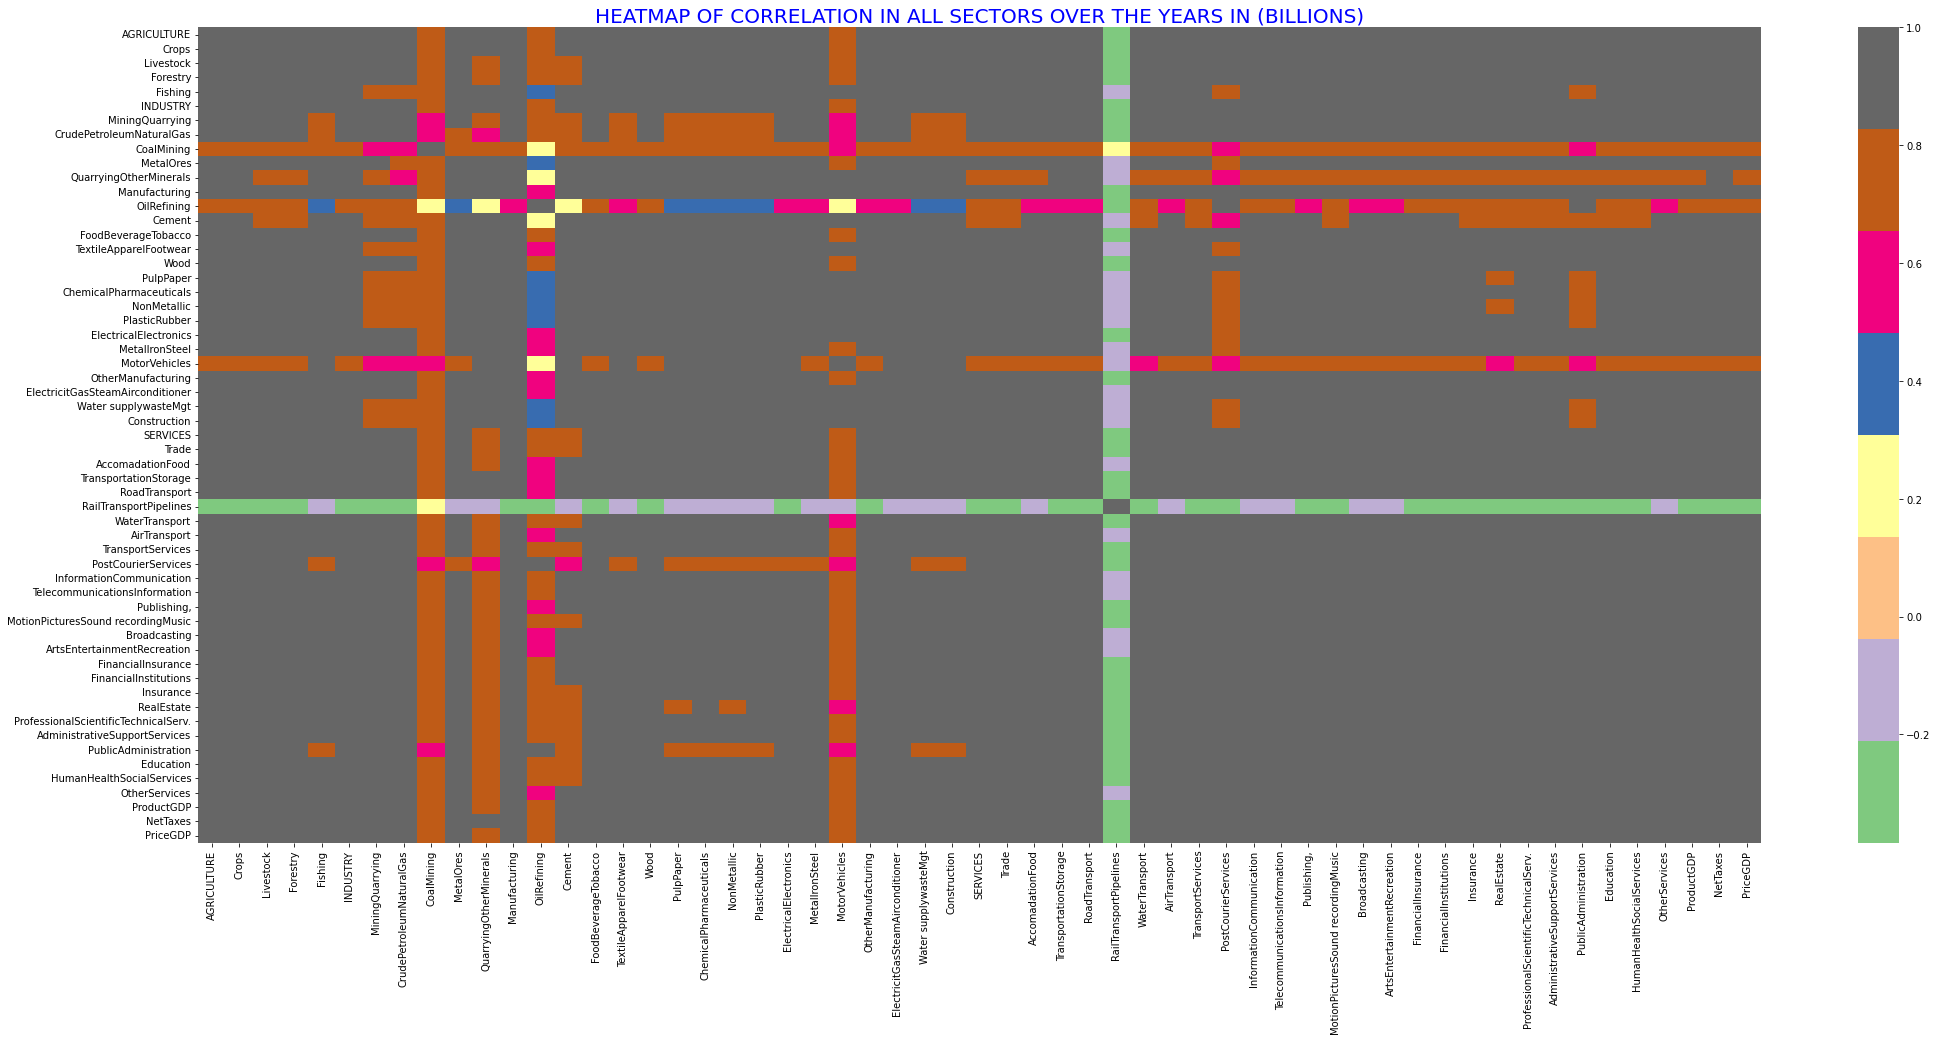

In [7]:
#plotting the correlation output over the years 
plt.figure(figsize = (35,15))
sns.heatmap(d6.corr(), cmap = 'Accent')
plt.title('HEATMAP OF CORRELATION IN ALL SECTORS OVER THE YEARS IN (BILLIONS)', color='b', size=20.0)


Text(0.5, 1.0, 'HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)')

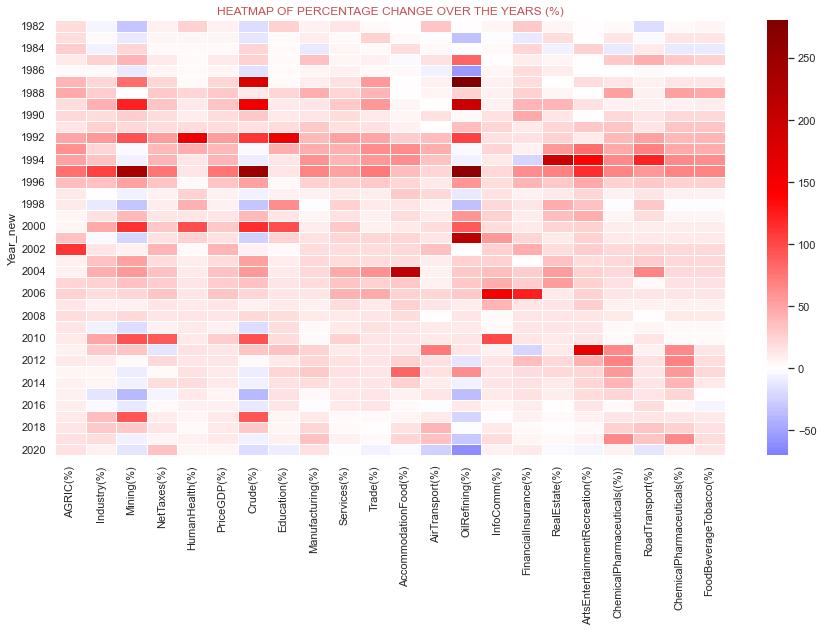

In [63]:
#Heatmap of percentage change over the years
plt.figure(figsize=(15,8))
sns.heatmap(d5,linewidths=1, vmin=-70, vmax=280, center=0, cmap='seismic')
plt.title('HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)', color='r')


Text(0.5, 1.0, 'HEATMAP OF STATISTICS SUMMARY OF CHANGE OVER THE YEARS')

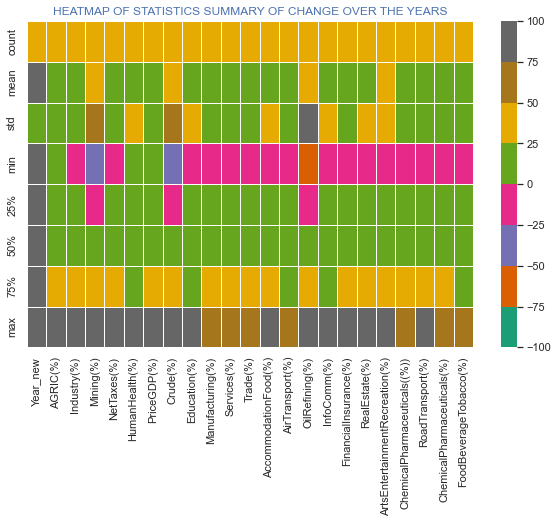

In [64]:
#sumarry statistics of percentage change over the years
plt.figure(figsize=(10,6))
sns.heatmap(data = d7, cmap = 'Dark2',linewidths=0.5, vmin=-100, vmax=100, center=0,)
plt.title('HEATMAP OF STATISTICS SUMMARY OF CHANGE OVER THE YEARS', color='b')

<AxesSubplot:xlabel='Year', ylabel='CrudePetroleumNaturalGas'>

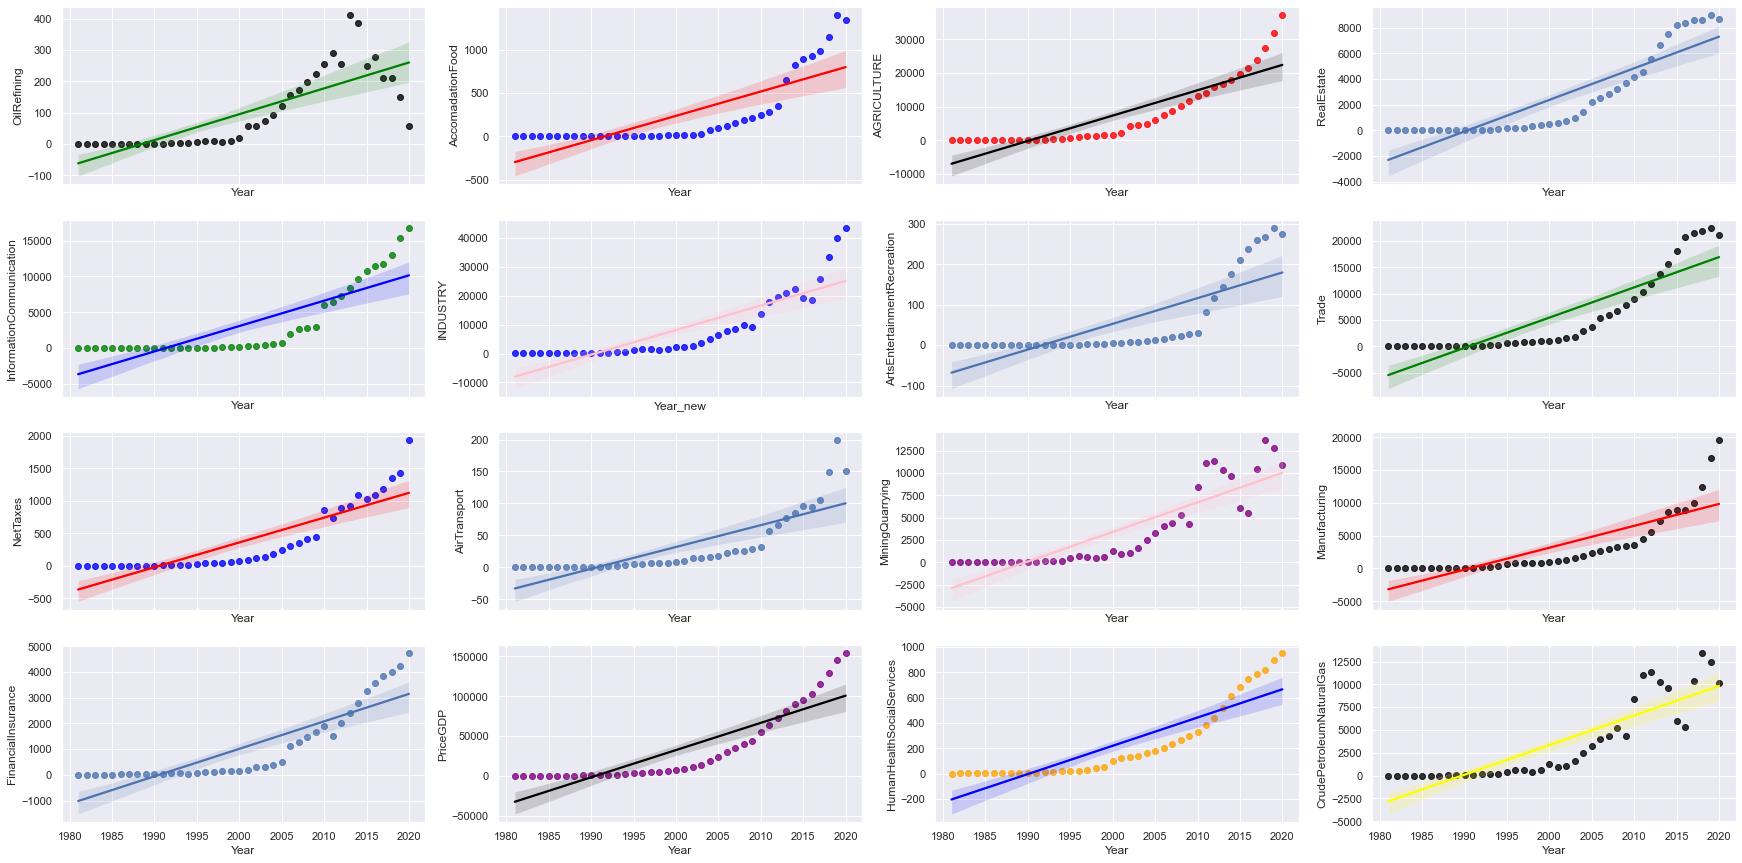

In [65]:
#This is  regression plot of original dataset over the years
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,15), sharex=True)


sns.regplot(data = d1, y = 'OilRefining', x = 'Year', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = d1, y = 'AccomadationFood', x = 'Year', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'AGRICULTURE', x = 'Year', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = d1, y = 'RealEstate', x = 'Year', ax=axs[0,3])

sns.regplot(data = d1, y = 'InformationCommunication', x = 'Year',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = d1, y = 'ArtsEntertainmentRecreation', x = 'Year', ax=axs[1,2])
sns.regplot(data = d1, y = 'INDUSTRY', x = 'Year_new', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = d1, y = 'Trade', x = 'Year', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = d1, y = 'NetTaxes', x = 'Year', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'AirTransport', x = 'Year', ax=axs[2,1])
sns.regplot(data = d1, y = 'MiningQuarrying', x = 'Year', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = d1, y = 'Manufacturing', x = 'Year', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'FinancialInsurance', x = 'Year', ax=axs[3,0])
sns.regplot(data = d1, y = 'PriceGDP', x = 'Year', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = d1, y = 'HumanHealthSocialServices', x = 'Year', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = d1, y = 'CrudePetroleumNaturalGas', x = 'Year', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})


<AxesSubplot:xlabel='Year_new', ylabel='Crude(%)'>

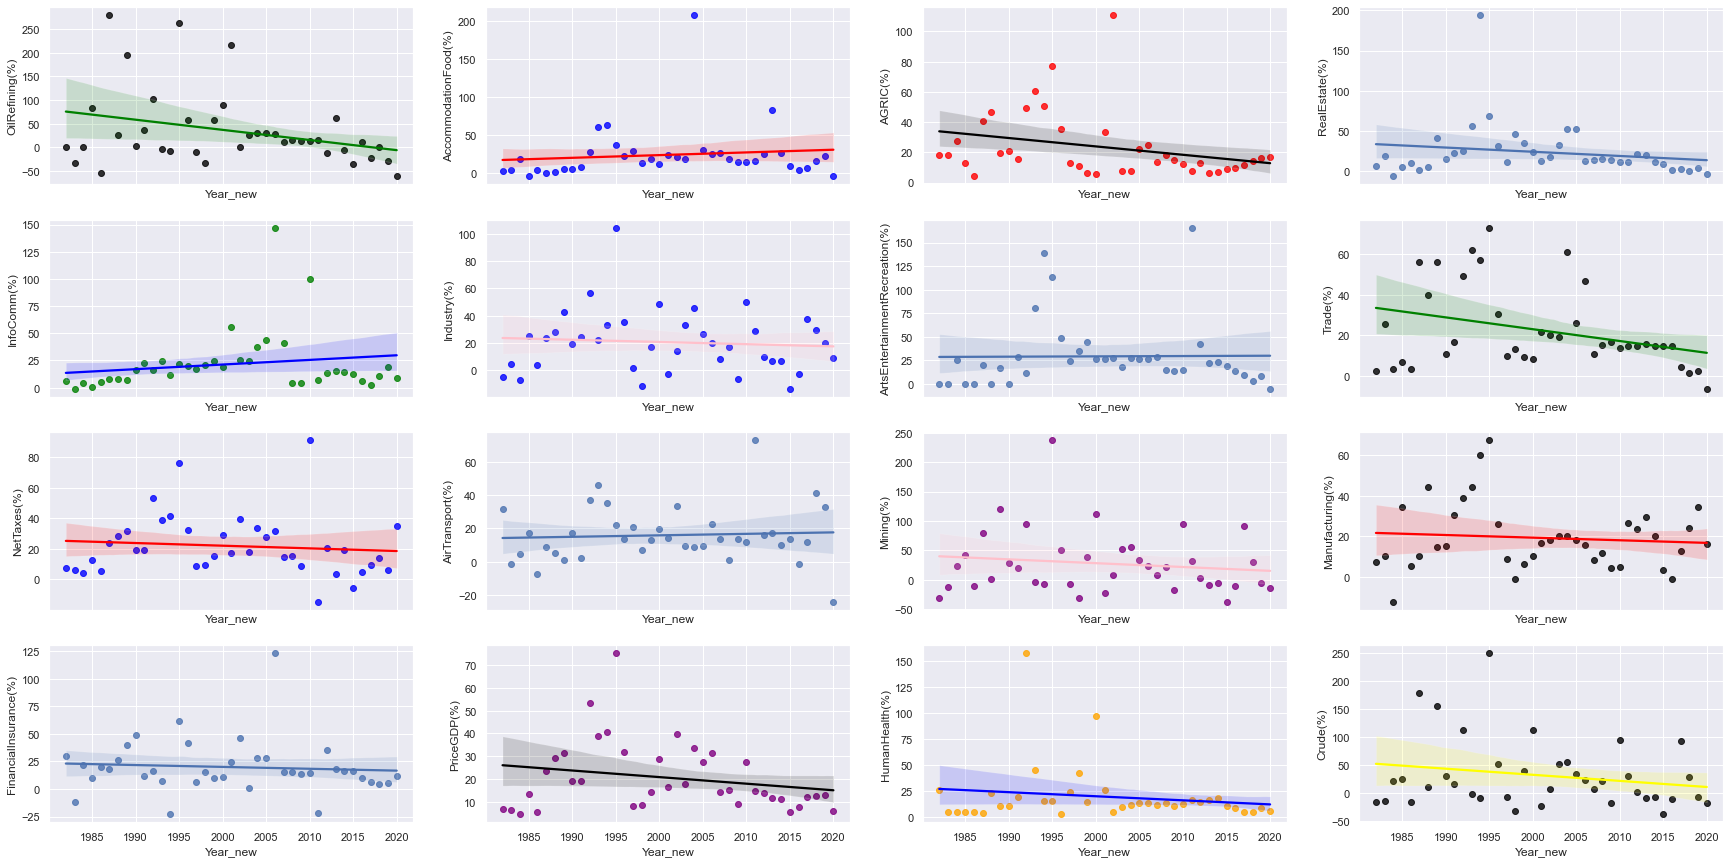

In [66]:
##This is  regression plot of percentage change over the years
# Initialise the subplot function using number of rows and columns
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,15), sharex=True)


sns.regplot(data = d1, y = 'OilRefining(%)', x = 'Year_new', ax=axs[0,0],
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = d1, y = 'AccommodationFood(%)', x = 'Year_new', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'AGRIC(%)', x = 'Year_new', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = d1, y = 'RealEstate(%)', x = 'Year_new', ax=axs[0,3])

sns.regplot(data = d1, y = 'InfoComm(%)', x = 'Year_new',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = d1, y = 'ArtsEntertainmentRecreation(%)', x = 'Year_new', ax=axs[1,2])
sns.regplot(data = d1, y = 'Industry(%)', x = 'Year_new', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = d1, y = 'Trade(%)', x = 'Year_new', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = d1, y = 'NetTaxes(%)', x = 'Year_new', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'AirTransport(%)', x = 'Year_new', ax=axs[2,1])
sns.regplot(data = d1, y = 'Mining(%)', x = 'Year_new', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = d1, y = 'Manufacturing(%)', x = 'Year_new', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = d1, y = 'FinancialInsurance(%)', x = 'Year_new', ax=axs[3,0])
sns.regplot(data = d1, y = 'PriceGDP(%)', x = 'Year_new', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = d1, y = 'HumanHealth(%)', x = 'Year_new', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = d1, y = 'Crude(%)', x = 'Year_new', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})




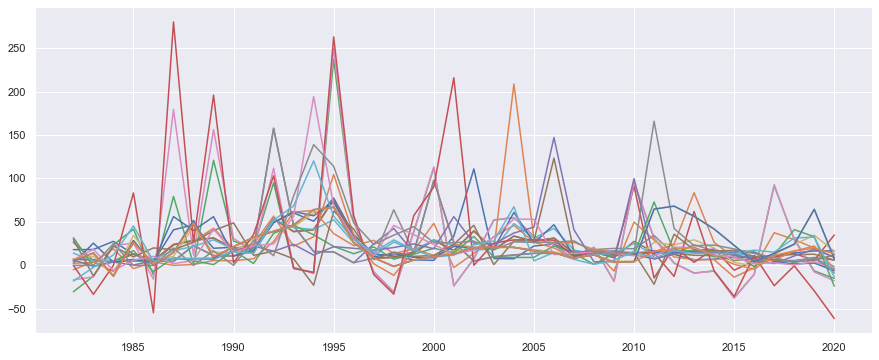

In [67]:
#a line graph of percentage change over the years

plt.figure(figsize = (15,6))
plt.plot(d5)

Text(0.5, 1.0, 'HEATMAP OF STATISTICS SUMMARY OF OUTPUT OVER THE YEARS')

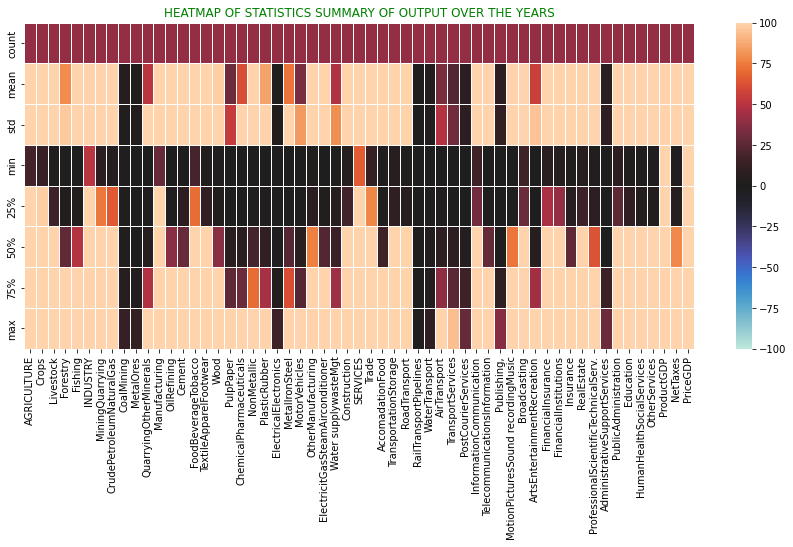

In [8]:
#plotting of statistics summary of percentage change over the years.
plt.figure(figsize = (15,6))
sns.heatmap(d9, vmin=-100, vmax=100, center=0,linewidth=1)
plt.title('HEATMAP OF STATISTICS SUMMARY OF OUTPUT OVER THE YEARS', color='g')

Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF PERCENTAGE CHANGE OVER OTHER SECTORS')

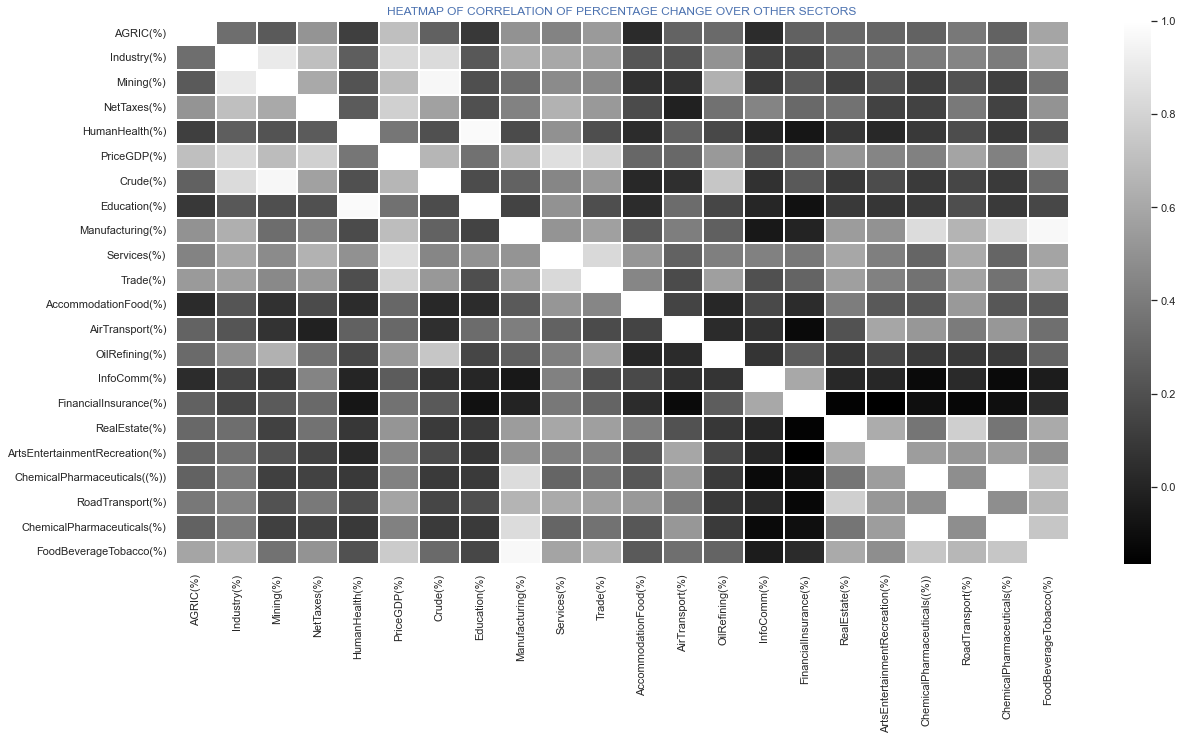

In [69]:
#correlation plot of percentage change over each sector 
plt.figure(figsize=(20,10))
sns.heatmap(data = d5.corr(), cmap = 'gray', linewidth=2)
plt.title('HEATMAP OF CORRELATION OF PERCENTAGE CHANGE OVER OTHER SECTORS', color='b')

Text(0.5, 1.0, 'HEATMAP OF STATISTICS SUMMARY OF PERCENTAGE CHANGE OVER THE YEARS')

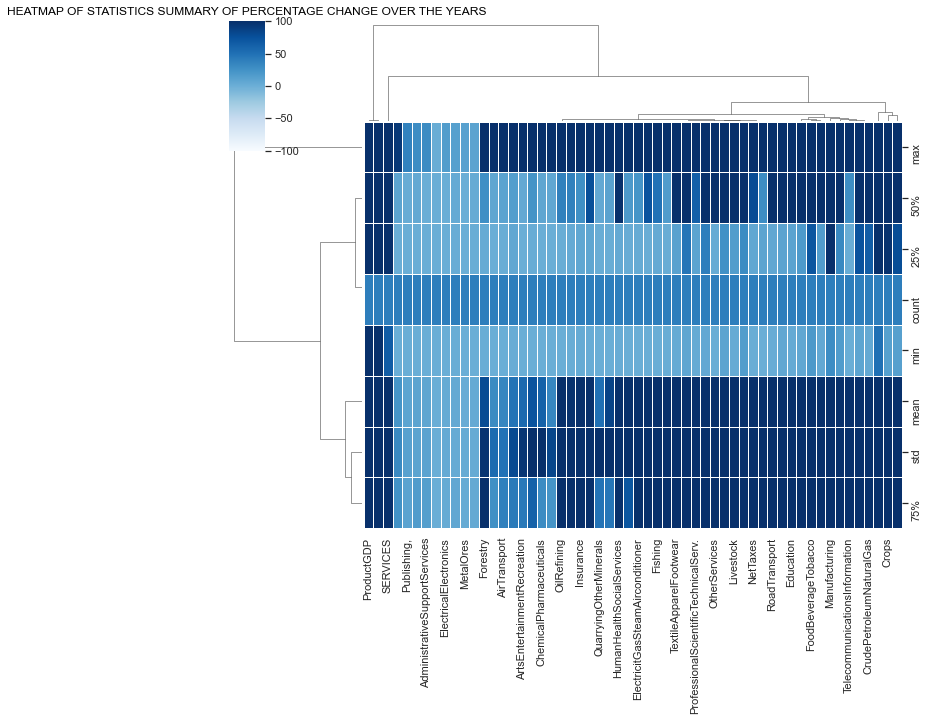

In [70]:

sns.clustermap(d9,linewidths =1, vmin=-100, vmax=100, center=0, cmap='Blues')
plt.title('HEATMAP OF STATISTICS SUMMARY OF PERCENTAGE CHANGE OVER THE YEARS', color='black')

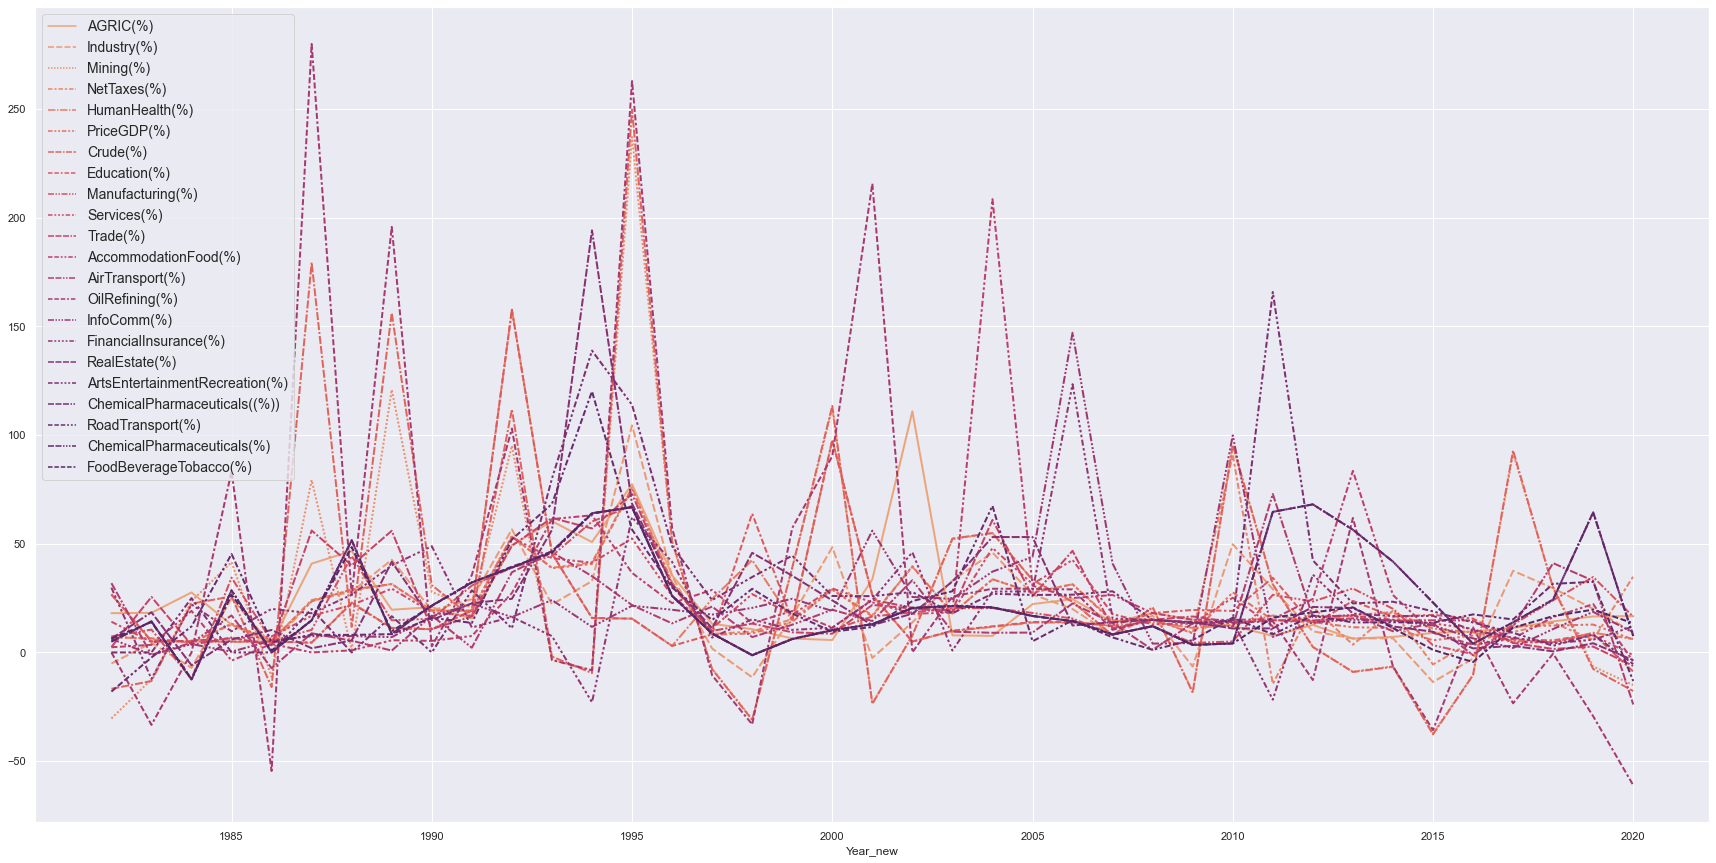

In [71]:
plt.figure(figsize = (30,15))
sns.set_theme(style="darkgrid")
sns.lineplot(data = d5, palette="flare", estimator=None, lw=2)
plt.legend(loc='best', fontsize=14)


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF PERCENTAGE CHANGE IN EACH SECTOR OVER THE YEARS')

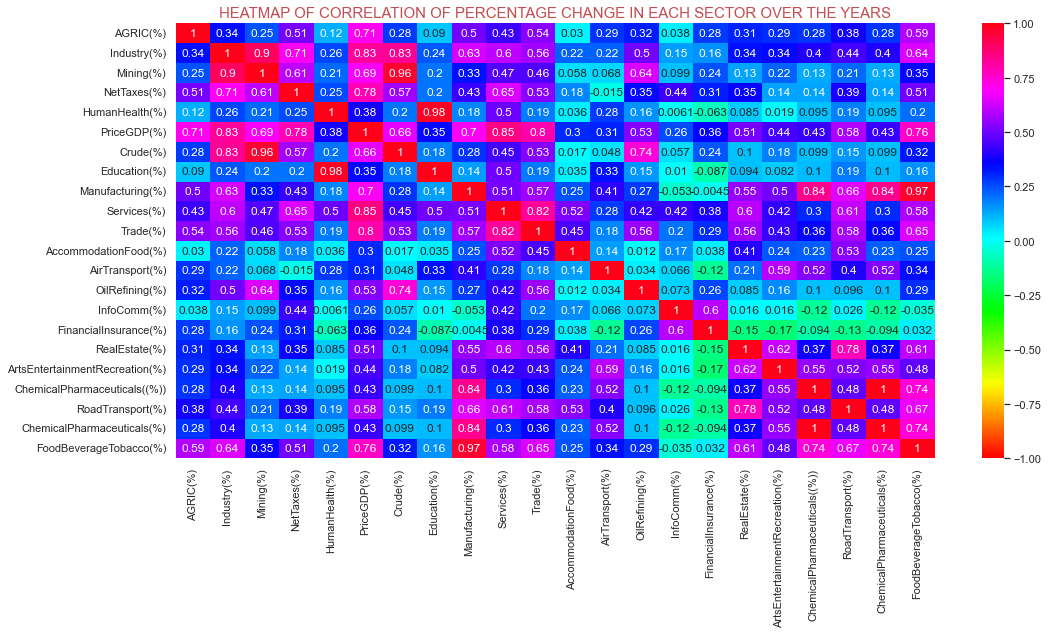

In [72]:
plt.figure(figsize = (17,8))
sns.heatmap(d5.corr(), annot = True, cmap = 'hsv', center = 0, vmin=-1, vmax=1)
plt.title('HEATMAP OF CORRELATION OF PERCENTAGE CHANGE IN EACH SECTOR OVER THE YEARS', color='r', size=15.0)

